In [1]:
import sys
sys.path.append('..')

import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import torch
import pandas as pd
import seaborn as sns

labels = {
    'Background': 0,
    'Tubules': 1,
    # 'Vein': 2,
    'Vein / Indeterminate vessel ': 2,  # Same as Vein - relabelled
    'Artery': 3,
    'Glomeruli': 4
}

alpha = 1.0
# colors = [purple, red, green, yellow, blue]
colors = [(128/255, 0, 128/255, alpha), # purple (background)
            (1, 0, 0, alpha), # red (tubules)
            (1, 1, 0, alpha), # yellow (indeterminate)
            (0, 1, 0, alpha), # green (artery)
            (0, 0, 1, alpha)] # blue (glomeruli)
cmap = mcolors.ListedColormap(colors)

# MAIN

In [3]:
def label_count(filename):
    with h5py.File(filename, 'r') as hf:
        imgs = hf['data']
        masks = hf['labels']

        print('Number of images:', len(imgs))
        print('Number of masks:', len(masks))

        print(f"imgs.shape: {imgs.shape}, imgs.dtype: {imgs.dtype}")
        print(f"masks.shape: {masks.shape}, masks.dtype: {masks.dtype}")

        # Count the number of masks that contain each label
        mask_counts = {label: 0 for label in labels}
        for mask in masks:
            for label, value in labels.items():
                if value in mask:
                    mask_counts[label] += 1

        print(f"mask_counts: {mask_counts}")

        print(f"masks: {np.unique(masks, return_counts=True)}")

In [91]:
# import matplotlib.colors as mcolors

# with h5py.File('train_data.h5', 'r') as hf:
#     imgs = hf['data']
#     masks = hf['labels']

#     for idx, mask in enumerate(masks):
#         if 0 not in mask:
#             print(f"Mask {idx} does not contain background")
            
#             colors = ['purple', 'yellow', 'green', 'red', 'blue']
#             cmap = mcolors.ListedColormap(colors)

#             plt.imshow(imgs[idx])
#             plt.axis('off')
#             plt.show()

#             plt.imshow(mask, cmap=cmap, vmin=0, vmax=4)
#             plt.axis('off')
#             plt.show()

In [19]:
label_count('train_data.h5')

Number of images: 5748
Number of masks: 5748
imgs.shape: (5748, 512, 512, 3), imgs.dtype: uint8
masks.shape: (5748, 512, 512), masks.dtype: uint8
mask_counts: {'Background': 5729, 'Tubuli': 4729, 'Vein': 1572, 'Vessel_indeterminate': 1572, 'Artery': 461, 'Glomerui': 784}
masks: (array([0, 1, 2, 3, 4], dtype=uint8), array([784943490, 614150676,  21992478,  19882160,  65834908]))


In [14]:
label_count('train_data_new.h5')

Number of images: 5400
Number of masks: 5400
imgs.shape: (5400, 512, 512, 3), imgs.dtype: uint8
masks.shape: (5400, 512, 512), masks.dtype: uint8
mask_counts: {'Background': 5381, 'Tubuli': 4434, 'Vein': 1527, 'Vessel_indeterminate': 1527, 'Artery': 439, 'Glomerui': 718}
masks: (array([0, 1, 2, 3, 4], dtype=uint8), array([739861769, 575635774,  21158409,  19049382,  59872266]))


In [5]:
label_count('train_data_random.h5')

Number of images: 5428
Number of masks: 5428
imgs.shape: (5428, 512, 512, 3), imgs.dtype: uint8
masks.shape: (5428, 512, 512), masks.dtype: uint8
mask_counts: {'Background': 5409, 'Tubuli': 4475, 'Vein': 1471, 'Vessel_indeterminate': 1471, 'Artery': 407, 'Glomerui': 723}
masks: (array([0, 1, 2, 3, 4], dtype=uint8), array([740704471, 582387024,  20723026,  17634184,  61468927]))


In [128]:
label_count('train_data_1024.h5')

Number of images: 1357
Number of masks: 1357
imgs.shape: (1357, 1024, 1024, 3), imgs.dtype: uint8
masks.shape: (1357, 1024, 1024), masks.dtype: uint8
mask_counts: {'Background': 1357, 'Tubules': 1337, 'Vein / Indeterminate vessel ': 488, 'Artery': 224, 'Glomeruli': 335}
masks: (array([0, 1, 2, 3, 4], dtype=uint8), array([740704471, 582387024,  20723026,  17634184,  61468927]))


In [ ]:
label_count('test_data.h5')

In [ ]:
label_count('test_data_new.h5')

In [7]:
label_count('test_data_random.h5')

Number of images: 102
Number of masks: 102
imgs.shape: (102, 1024, 1024, 3), imgs.dtype: uint8
masks.shape: (102, 1024, 1024), masks.dtype: uint8
mask_counts: {'Background': 102, 'Tubuli': 95, 'Vein': 38, 'Vessel_indeterminate': 38, 'Artery': 28, 'Glomerui': 33}
masks: (array([0, 1, 2, 3, 4], dtype=uint8), array([54451107, 42931338,  1627519,  2487876,  5456912]))


In [129]:
label_count('test_data_1024.h5')

Number of images: 102
Number of masks: 102
imgs.shape: (102, 1024, 1024, 3), imgs.dtype: uint8
masks.shape: (102, 1024, 1024), masks.dtype: uint8
mask_counts: {'Background': 102, 'Tubules': 95, 'Vein / Indeterminate vessel ': 38, 'Artery': 28, 'Glomeruli': 33}
masks: (array([0, 1, 2, 3, 4], dtype=uint8), array([54451107, 42931338,  1627519,  2487876,  5456912]))


In [2]:
from utils.get_dataloaders import get_train_loaders, get_test_loader

def get_mask_counts(train_file, test_file):
    SEED = 42
    torch.manual_seed(SEED)

    train_loader, val_loader = get_train_loaders(train_file, seed=SEED)
    test_loader = get_test_loader(test_file)

    mask_counts_train = {label: 0 for label in labels}
    # mask_counts_train['all'] = 0

    for i, (_, mask, _) in enumerate(train_loader):
        # mask_counts_train['all'] += 1
        for label, value in labels.items():
            if value in mask:
                mask_counts_train[label] += 1

    print(f"mask_counts_train: {mask_counts_train}")

    mask_counts_val = {label: 0 for label in labels}
    # mask_counts_val['all'] = 0

    for i, (_, mask, _) in enumerate(val_loader):
        # mask_counts_val['all'] += 1
        for label, value in labels.items():
            if value in mask:
                mask_counts_val[label] += 1

    print(f"mask_counts_val: {mask_counts_val}")

    mask_counts_test = {label: 0 for label in labels}
    # mask_counts_test['all'] = 0

    for i, (_, mask, _) in enumerate(test_loader):
        # mask_counts_test['all'] += 1
        for label, value in labels.items():
            if value in mask:
                mask_counts_test[label] += 1

    print(f"mask_counts_test: {mask_counts_test}")

    counts_dict = {
        'train_counts': mask_counts_train,
        'train_len': len(train_loader),
        'val_counts': mask_counts_val,
        'val_len': len(val_loader),
        'test_counts': mask_counts_test,
        'test_len': len(test_loader)
    }

    return counts_dict

In [27]:
def plot_label_ratios(counts_dict, palette='deep'):

    mask_counts_train = counts_dict['train_counts']
    mask_counts_val = counts_dict['val_counts']
    mask_counts_test = counts_dict['test_counts']

    train_len = counts_dict['train_len']
    val_len = counts_dict['val_len']
    test_len = counts_dict['test_len']

    # classes = list(mask_counts_train.keys())
    classes = ['Background', 'Tubule', 'Vein / Indeterminate Vessel', 'Artery', 'Glomerulus']
    train_counts = list(mask_counts_train.values())
    val_counts = list(mask_counts_val.values())
    test_counts = list(mask_counts_test.values())

    train_percentages = [count / train_len for count in train_counts]
    val_percentages = [count / val_len for count in val_counts]
    test_percentages = [count / test_len for count in test_counts]

    # x = np.arange(len(classes))
    # width = 0.25

    # fig, ax = plt.subplots()
    # rects1 = ax.bar(x - width, train_percentages, width, label='Train')
    # rects2 = ax.bar(x, val_percentages, width, label='Validation')
    # rects3 = ax.bar(x + width, test_percentages, width, label='Test')

    # ax.set_ylabel('Percentage')
    # ax.set_title('Percentage of each label in the training, validation and test sets')
    # ax.set_xticks(x)
    # ax.set_xticklabels(classes)
    # ax.legend()

    # fig.tight_layout()

    # plt.show()


    data = pd.DataFrame({
        'Class': np.tile(classes, 3),  # Repeats classes for train, val, test
        'Percentage': np.concatenate([train_percentages, val_percentages, test_percentages]),
        'Dataset': ['Train'] * len(classes) + ['Validation'] * len(classes) + ['Test'] * len(classes)
    })

    sns.set_palette(palette)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Class', y='Percentage', hue='Dataset', data=data)
    plt.title('Percentage of Original Dataset Containing Each Class (Training, Validation and Test)')
    plt.ylabel('Percentage (%)')
    plt.xlabel('Class')
    plt.legend(title='Dataset')
    plt.tight_layout()

    plt.savefig('top5_dataset_percentages.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.5)

    plt.show()

In [6]:
counts_dict_new = get_mask_counts('train_data_new.h5', 'test_data_new.h5')

Number of training samples: 5400
mask_counts_train: {'Background': 4844, 'Tubules': 4006, 'Vein / Indeterminate vessel ': 1372, 'Artery': 392, 'Glomeruli': 637}
mask_counts_val: {'Background': 537, 'Tubules': 428, 'Vein / Indeterminate vessel ': 155, 'Artery': 47, 'Glomeruli': 81}
mask_counts_test: {'Background': 109, 'Tubules': 108, 'Vein / Indeterminate vessel ': 17, 'Artery': 15, 'Glomeruli': 35}


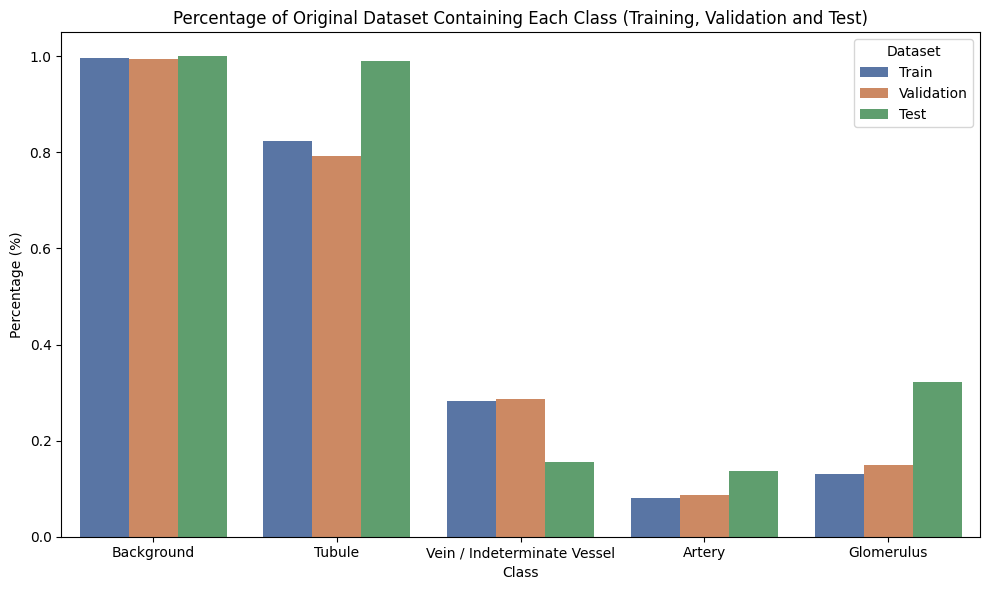

In [28]:
plot_label_ratios(counts_dict_new, palette='deep')

In [84]:
counts_dict = get_mask_counts('train_data.h5', 'test_data.h5')

Number of training samples: 5748
mask_counts_train: {'Background': 5155, 'Tubuli': 4263, 'Vein / Vessel indeterminate': 1430, 'Artery': 409, 'Glomerui': 713}
mask_counts_val: {'Background': 574, 'Tubuli': 466, 'Vein / Vessel indeterminate': 142, 'Artery': 52, 'Glomerui': 71}
mask_counts_test: {'Background': 22, 'Tubuli': 22, 'Vein / Vessel indeterminate': 2, 'Artery': 3, 'Glomerui': 6}


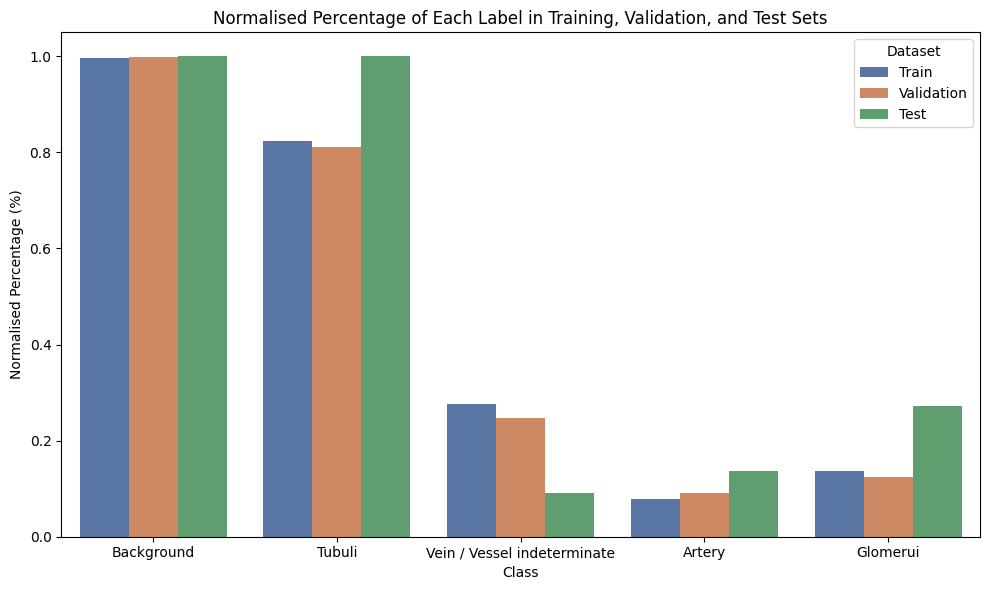

In [85]:
plot_label_ratios(counts_dict, palette='deep')

In [20]:
counts_dict_random = get_mask_counts('train_data_random.h5', 'test_data_random.h5')

Number of training samples: 5428


mask_counts_train: {'Background': 4867, 'Tubules': 4025, 'Vein / Indeterminate vessel ': 1333, 'Artery': 367, 'Glomeruli': 652}
mask_counts_val: {'Background': 542, 'Tubules': 450, 'Vein / Indeterminate vessel ': 138, 'Artery': 40, 'Glomeruli': 71}
mask_counts_test: {'Background': 102, 'Tubules': 95, 'Vein / Indeterminate vessel ': 38, 'Artery': 28, 'Glomeruli': 33}


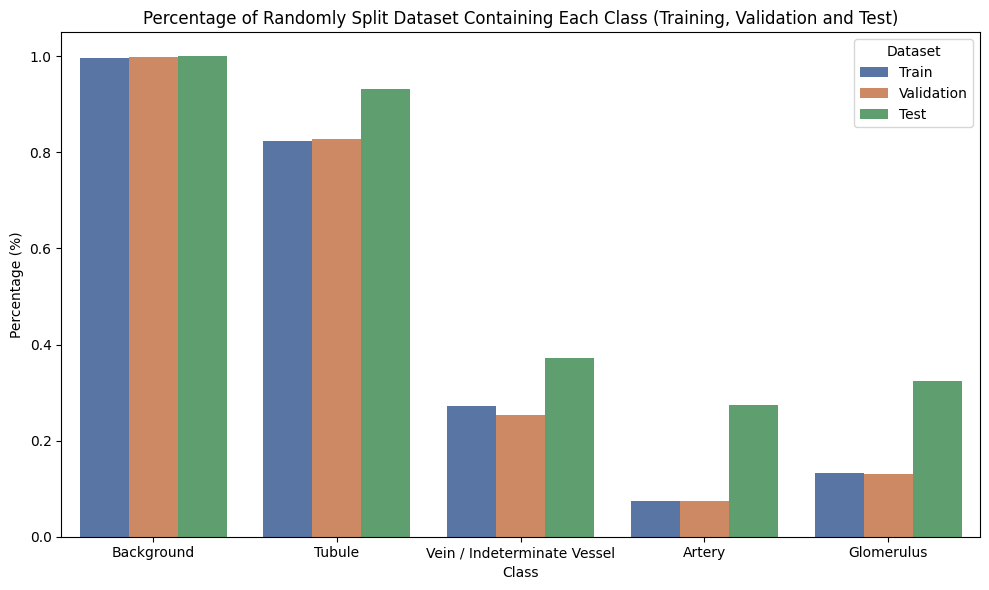

In [26]:
plot_label_ratios(counts_dict_random, palette='deep')

In [3]:
# Count number of images that consist only of background

with h5py.File("train_data_random.h5", 'r') as hf:
    imgs = hf['data']
    masks = hf['labels']

    background_count = 0

    for mask in masks:
        if np.all(mask == 0):
            background_count += 1

    print(f"Number of images that consist only of background: {background_count}")
    print(f"total number of images: {len(masks)}")

Number of images that consist only of background: 808
total number of images: 5428
